In [1]:
import MDAnalysis as mda
from MDAnalysis.analysis import distances
from MDAnalysis.analysis import rms, align
from MDAnalysis import Universe
import MDAnalysis.analysis.encore as encore
from MDAnalysis.analysis.base import (AnalysisBase,
                                      AnalysisFromFunction,
                                      analysis_class)

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

INFO:rdkit:Enabling RDKit 2023.03.3 jupyter extensions
INFO:numexpr.utils:Note: NumExpr detected 20 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [2]:
#amber trajectories 100 ns 
u = mda.Universe("/pascal/data/project/100ns_prod_runs/prod_100ns_amber_lig_only_4000_1/amber_copy.parm7", "/pascal/data/project/100ns_prod_runs/prod_100ns_amber_lig_only_4000_1/amber.nc")
u_2 = mda.Universe("/pascal/data/project/100ns_prod_runs/prod_100ns_amber_lig_only_4000_2/amber_copy.parm7", "/pascal/data/project/100ns_prod_runs/prod_100ns_amber_lig_only_4000_2/amber.nc")
u_3 = mda.Universe("/pascal/data/project/100ns_prod_runs/prod_100ns_amber_lig_only_4000_3/amber_copy.parm7", "/pascal/data/project/100ns_prod_runs/prod_100ns_amber_lig_only_4000_3/amber.nc")

#espaloma traj
u_4 = mda.Universe("/pascal/data/project/espaloma/prod_100ns_4000/amber_copy.parm7", "/pascal/data/project/espaloma/prod_100ns_4000/amber.nc")
u_5 = mda.Universe("/pascal/data/project/espaloma/prod_100ns_4000_2/amber_copy.parm7", "/pascal/data/project/espaloma/prod_100ns_4000_2/amber.nc")
u_6 = mda.Universe("/pascal/data/project/espaloma/prod_100ns_4000_3/amber_copy.parm7", "/pascal/data/project/espaloma/prod_100ns_4000_3/amber.nc")

In [11]:
#amber trajectories 1000 ns
u = mda.Universe("/pascal/data/project/prod_runs/prod_1000ns_amber_lig_only_4000_1/amber_copy.parm7", "/pascal/data/project/prod_runs/prod_1000ns_amber_lig_only_4000_1/amber.nc")
u_2 = mda.Universe("/pascal/data/project/prod_runs/prod_1000ns_amber_lig_only_4000_2/amber_copy.parm7", "/pascal/data/project/prod_runs/prod_1000ns_amber_lig_only_4000_2/amber.nc")
u_3 = mda.Universe("/pascal/data/project/prod_runs/prod_1000ns_amber_lig_only_4000_3/amber_copy.parm7", "/pascal/data/project/prod_runs/prod_1000ns_amber_lig_only_4000_3/amber.nc")

#espaloma traj
u_4 = mda.Universe("/pascal/data/project/espaloma/prod_1000ns_40000/amber_copy.parm7", "/pascal/data/project/espaloma/prod_1000ns_40000/amber.nc")
u_5 = mda.Universe("/pascal/data/project/espaloma/prod_1000ns_40000_2/amber_copy.parm7", "/pascal/data/project/espaloma/prod_1000ns_40000_2/amber.nc")
u_6 = mda.Universe("/pascal/data/project/espaloma/prod_1000ns_40000_3/amber_copy.parm7", "/pascal/data/project/espaloma/prod_1000ns_40000_3/amber.nc")

In [13]:
#amber 100 ns trajectories of protein-ligand
u = mda.Universe("/pascal/data/project/100ns_prod_runs/prod_100ns_amber_4000_1/amber_copy.parm7", "/pascal/data/project/100ns_prod_runs/prod_100ns_amber_4000_1/amber.nc")
u_2 =mda.Universe("/pascal/data/project/100ns_prod_runs/prod_100ns_amber_4000_2/amber_copy.parm7", "/pascal/data/project/100ns_prod_runs/prod_100ns_amber_4000_2/amber.nc")
u_3 =mda.Universe("/pascal/data/project/100ns_prod_runs/prod_100ns_amber_4000_3/amber_copy.parm7", "/pascal/data/project/100ns_prod_runs/prod_100ns_amber_4000_3/amber.nc")

#espaloma traj
u_4 = mda.Universe("/pascal/data/project/protein_ligand/prod_100ns_esp_4000/amber_copy.parm7", "/pascal/data/project/protein_ligand/prod_100ns_esp_4000/amber.nc")
u_5 = mda.Universe("/pascal/data/project/protein_ligand/prod_100ns_esp_4000_2/amber_copy.parm7", "/pascal/data/project/protein_ligand/prod_100ns_esp_4000_2/amber.nc")
u_6 = mda.Universe("/pascal/data/project/protein_ligand/prod_100ns_esp_4000_3/amber_copy.parm7", "/pascal/data/project/protein_ligand/prod_100ns_esp_4000_3/amber.nc")

In [42]:
#amber trajectories 1000 ns protein-ligand
u = mda.Universe("/pascal/data/project/prod_runs/prod_1000ns_amber_4000_1/amber_copy.parm7", "/pascal/data/project/prod_runs/prod_1000ns_amber_4000_1/amber.nc")
u_2 =mda.Universe("/pascal/data/project/prod_runs/prod_1000ns_amber_4000_2/amber_copy.parm7", "/pascal/data/project/prod_runs/prod_1000ns_amber_4000_2/amber.nc")
u_3 =mda.Universe("/pascal/data/project/prod_runs/prod_1000ns_amber_4000_3/amber_copy.parm7", "/pascal/data/project/prod_runs/prod_1000ns_amber_4000_3/amber.nc")

#espaloma traj
u_4 = mda.Universe("/pascal/data/project/protein_ligand/prod_1000ns_esp_4000/amber_copy.parm7", "/pascal/data/project/protein_ligand/prod_1000ns_esp_4000/amber.nc")
u_5 = mda.Universe("/pascal/data/project/protein_ligand/prod_1000ns_esp_4000_2/amber_copy.parm7", "/pascal/data/project/protein_ligand/prod_1000ns_esp_4000_2/amber.nc")
u_6 = mda.Universe("/pascal/data/project/protein_ligand/prod_1000ns_esp_4000_3/amber_copy.parm7", "/pascal/data/project/protein_ligand/prod_1000ns_esp_4000_3/amber.nc")

In [14]:
#dropping first 5 % of the frames 
traj = u.trajectory
print(len(traj))
drop_frames = int(traj.n_frames * 0.05)

drop_frames_esp= int(u_4.trajectory.n_frames *0.05)
print(drop_frames_esp)

4000
200


In [15]:
#selecting only heavy atoms
selection_1= u.select_atoms("resid 1:12 and not name H*")
selection_2= u_2.select_atoms("resid 1:12 and not name H*")
selection_3= u_3.select_atoms("resid 1:12 and not name H*")
selection_4= u_4.select_atoms("index 0:92")
selection_5= u_5.select_atoms("index 0:92")
selection_6= u_6.select_atoms("index 0:92")

In [16]:
#function to calculate the radius of gyration of the molecule 

def radgyr(atomgroup, masses, total_mass=None):
    # coordinates change for each frame
    coordinates = atomgroup.positions
    center_of_mass = atomgroup.center_of_mass()

    # get squared distance from center
    ri_sq = (coordinates-center_of_mass)**2
    # sum the unweighted positions
    sq = np.sum(ri_sq, axis=1)
    sq_x = np.sum(ri_sq[:,[1,2]], axis=1) # sum over y and z
    sq_y = np.sum(ri_sq[:,[0,2]], axis=1) # sum over x and z
    sq_z = np.sum(ri_sq[:,[0,1]], axis=1) # sum over x and y

    # make into array
    sq_rs = np.array([sq, sq_x, sq_y, sq_z])

    # weight positions
    rog_sq = np.sum(masses*sq_rs, axis=1)/total_mass
    # square root and return
    return np.sqrt(rog_sq)

In [17]:
rog = AnalysisFromFunction(radgyr, u.trajectory,
                           selection_1, selection_1.masses,
                           total_mass=np.sum(selection_1.masses))
rog.run()

rog_2 = AnalysisFromFunction(radgyr, u_2.trajectory,
                           selection_2, selection_2.masses,
                           total_mass=np.sum(selection_2.masses))
rog_2.run()

rog_3 = AnalysisFromFunction(radgyr, u_3.trajectory,
                           selection_3, selection_3.masses,
                           total_mass=np.sum(selection_3.masses))
rog_3.run()

rog_4 = AnalysisFromFunction(radgyr, u_4.trajectory,
                           selection_4, selection_4.masses,
                           total_mass=np.sum(selection_4.masses))
rog_4.run()

rog_5 = AnalysisFromFunction(radgyr, u_5.trajectory,
                           selection_5, selection_5.masses,
                           total_mass=np.sum(selection_5.masses))
rog_5.run()

rog_6 = AnalysisFromFunction(radgyr, u_6.trajectory,
                          selection_6, selection_6.masses,
                           total_mass=np.sum(selection_6.masses))
rog_6.run()

In [18]:
rog.results['timeseries'].shape

(4000, 4)

In [19]:
df = pd.DataFrame(rog.results.timeseries)
df = df.rename(columns={'0': 'all'})
df = df.drop(df.columns[1:4], axis=1)
df = df.drop(index=range(drop_frames))

df_2 = pd.DataFrame(rog_2.results.timeseries)
df_2 = df_2.rename(columns={'0': 'all'})
df_2 = df_2.drop(df_2.columns[1:4], axis=1)
df_2 = df_2.drop(index=range(drop_frames))

df_3 = pd.DataFrame(rog_3.results.timeseries)
df_3 = df_3.rename(columns={'0': 'all'})
df_3 = df_3.drop(df_3.columns[1:4], axis=1)
df_3 = df_3.drop(index=range(drop_frames))

df_4 = pd.DataFrame(rog_4.results.timeseries)
df_4 = df_4.rename(columns={'0': 'all'})
df_4 = df_4.drop(df_4.columns[1:4], axis=1)
df_4 = df_4.drop(index=range(drop_frames_esp))

df_5 = pd.DataFrame(rog_5.results.timeseries)
df_5 = df_5.rename(columns={'0': 'all'})
df_5 = df_5.drop(df_4.columns[1:4], axis=1)
df_5 = df_5.drop(index=range(drop_frames_esp))

df_6 = pd.DataFrame(rog_6.results.timeseries)
df_6 = df_6.rename(columns={'0': 'all'})
df_6 = df_6.drop(df_6.columns[1:4], axis=1)
df_6 = df_6.drop(index=range(drop_frames_esp))

df

,0
200,6.602873
201,6.528002
202,6.494303
203,6.460833
204,6.351773
...,...
3995,6.743002
3996,6.720309
3997,6.658458
3998,6.750871


In [20]:
df['FF'] = 'Amber'
df_2['FF'] = 'Amber'
df_3['FF'] = 'Amber'
df_4['FF'] = 'espaloma 0.3.2'
df_5['FF'] = 'espaloma 0.3.2'
df_6['FF'] = 'espaloma 0.3.2'

In [33]:
#for long espaloma simulations when only 10 % of frames are needed

#subset_4= df_4.iloc[::10]
#subset_4.reset_index(drop=True, inplace=True)
#subset_4.index = subset_4.index +200

#subset_5= df_5.iloc[::10]
#subset_5.reset_index(drop=True, inplace=True)
#subset_5.index = subset_5.index +200

#subset_6= df_6.iloc[::10]
#subset_6.reset_index(drop=True, inplace=True)
#subset_6.index = subset_6.index +200

In [21]:
full_df = pd.concat([df, df_2, df_3, df_4, df_5, df_6])
full_df= full_df.drop(full_df.columns[2:5], axis=1)
full_df.columns.values[0] = 'xyz'
full_df.dropna(inplace=True)
full_df

,xyz,FF
200,6.602873,Amber
201,6.528002,Amber
202,6.494303,Amber
203,6.460833,Amber
204,6.351773,Amber
...,...,...
3995,6.090459,espaloma 0.3.2
3996,6.084892,espaloma 0.3.2
3997,6.134291,espaloma 0.3.2
3998,6.214223,espaloma 0.3.2


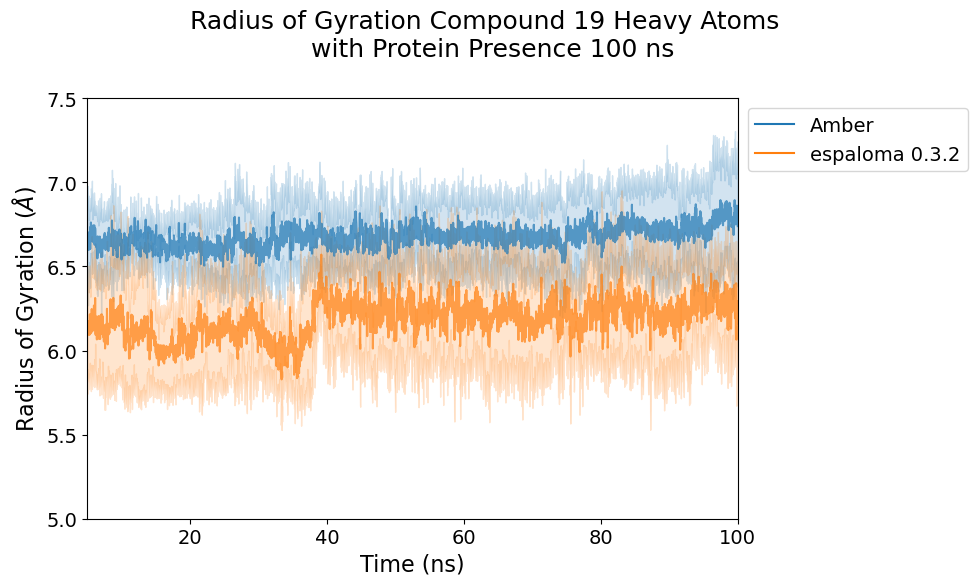

In [22]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=full_df, x=(full_df.index)/40, y='xyz', hue=full_df['FF'],alpha=0.7, estimator="mean", errorbar="sd")
plt.ylabel("Radius of Gyration ($\AA$)")
#plt.suptitle("Radius of Gyration Compound 19 Heavy Atoms \n with Protein Presence 1 $\mu$s")
plt.suptitle("Radius of Gyration Compound 19 Heavy Atoms \n with Protein Presence 100 ns")
#plt.xlim(2000,40000)
plt.xlabel("Time (ns)")
plt.xlim(5,100)
plt.ylim(5, 7.5)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig("plots_newamber/Gyration/gyr_protein_100")